In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np
from numpy import sqrt, pi, cos, sin, log, exp, sinh
from phidl import Device, Layer, LayerSet, device_layout, Path, CrossSection, Device
from phidl import quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu
import phidl.path as pp
from phidl import quickplot as qp
import bezier
import math
import sys
import os
import math
sys.path.append(os.path.abspath(r"/Users/kamilakunes/Desktop/MJLab/Chunho_lib_240919"))
from Chunho_lib_111723_airsuspended import *
from Chunho_lib_111723_electrodes import *
from Chunho_lib_111723_heaters import *
from Chunho_lib_111723_markers import *
from Chunho_lib_111723_waveguides import *
from Chunho_lib_111723_greyscale import *

In [2]:
ls = LayerSet() # Create a blank LayerSet
ls.add_layer(name = 'label', gds_layer = 1, gds_datatype = 0,
             description = 'General label', color = 'deeppink')
ls.add_layer(name = 'marker', gds_layer = 2, gds_datatype = 0,
             description = 'EBL marker', color = 'firebrick')
ls.add_layer(name = 'grating', gds_layer = 3, gds_datatype = 0,
             description = 'bragg_grating', color = 'darkturquoise')
ls.add_layer(name = 'wg', gds_layer = 4, gds_datatype = 0,
             description = 'LN wg', color = 'dodgerblue')
ls.add_layer(name = 'ring', gds_layer = 5, gds_datatype = 0,
             description = 'LN ring', color = 'deepskyblue')
ls.add_layer(name = 'gold1', gds_layer = 6, gds_datatype = 0,
             description = 'Gold electrode', color = 'gold')
ls.add_layer(name = 'via', gds_layer = 7, gds_datatype = 0,
             description = 'hole', color = 'grey')
ls.add_layer(name = 'gold2', gds_layer = 8, gds_datatype = 0,
             description = '2nd Gold electrode', color = 'goldenrod')
ls.add_layer(name = 'nicr', gds_layer = 9, gds_datatype = 0,
             description = 'heater', color = (0.4,0.5,0.7))
ls.add_layer(name = 'test', gds_layer = 10, gds_datatype = 0,
             description = 'alignment', color = 'lime')
ls.add_layer(name = 'mc', gds_layer = 11, gds_datatype = 0,
             description = 'mode converter', color = 'mediumblue')
ls.add_layer(name = 'detch', gds_layer = 12, gds_datatype = 0,
             description = 'deep etch', color = 'orangered')

pu.write_lyp('my_layer_properties_file.lyp', layerset = ls)

layer_label =  ls['label']
layer_marker = ls['marker']
layer_grating = ls['grating']
layer_wg = ls['wg']
layer_ring = ls['ring']
layer_metal = ls['gold1']
layer_via = ls['via']
layer_metal2 = ls['gold2']
layer_heater = ls['nicr']
layer_test = ls['test']
layer_MC = ls['mc']
layer_Detch = ls['detch']

In [3]:
c0=299792458

# parameters
radius_wg = 100
wg_single = 0.8
wg_dc_bus=1
wg_pulley_bus=0.8
wg_mod = 2.0
taperlength1 = 100 #General tapering

#1st Euler racetrack
ngrp=2.247

RFFSR0=50 #optical FSR in RF frequency
Matchpath=c0/ngrp/((RFFSR0)*1e9)*1e6

total_clength=200
RT_radius=150
RT_clength=7
RT_wg_ring=1.2
RT_wg_ring2=2
Euler_ratio=0.5

#2nd Euler racetrack

RT_clength2=56
RT_wg_ring3=1.2
RT_wg_ring4=2

#testrings
Tring_radius=150
Tring_bend_radius=100
Tring_wg_single=0.8
Tring_wg_ring1=1.2
Tring_wg_ring2=1.6
Tring_step=30
Tring_step2=65
Tring_dev_pitch_j2=500
Tring_xoffset1=-2650
Hpath1=210

#ModSegElec
mod_l = 50
period=50
num_i2=mod_l//period
gap_body1=3.7
edge_width1=6.5
edge_width2=0.5
center_width1=6.5
center_width2=0.5
edge_length1=0.5
center_length1=0.5
edge_length2=45
center_length2=45

wg_taper_length=100

pad_w=150
signal_body_w=50
gap_body2=gap_body1+(edge_width1+edge_width2)*2
turn_length1=106

#Directional coupler
couplinglength1=63.5
couplinggap1=1

DCoffset1=gap_body2+signal_body_w

##MMI
MMIMid=196

MMI_wg_single=0.8
MMI_wg_taper=3.5
MMI_wg_offset=4
MMI_tlength=200
MMI_clength=MMIMid
MMI_cwidth=8

Tring_wgcp1 = np.array([
    [0.7 for x in range(1)],
    [0.8 for x in range(1)],
    [0.9 for x in range(1)],
    [0.95 for x in range(1)],
    [1.0 for x in range(1)],
    [1.1 for x in range(1)]]
)

RT_wgcp1 = np.array([
    [0.9 for x in range(1)],
    [1.0 for x in range(1)],
    [1.05 for x in range(1)],
    [1.1 for x in range(1)],
    [1.2 for x in range(1)],
    [1.3 for x in range(1)]]
)

RT_wgcp2 = np.array([
    [0.9 for x in range(1)],
    [1.0 for x in range(1)],
    [1.05 for x in range(1)],
    [1.1 for x in range(1)],
    [1.2 for x in range(1)],
    [1.3 for x in range(1)]]
)



#Facet length
facet_length1=1000
facet_width1=3

D = Device()

chip_sizex=11500
chip_sizey=6500

dev_pitch_j = 500
dev_pitch_i = 1630


marker_dice_x = chip_sizex/2-2000
marker_dice_y = chip_sizey/2-dev_pitch_j

marker1_x = 4000
marker1_y = 2000

# step=350
num_i = 3
num_j = 6

pattern1_center = [0,0]


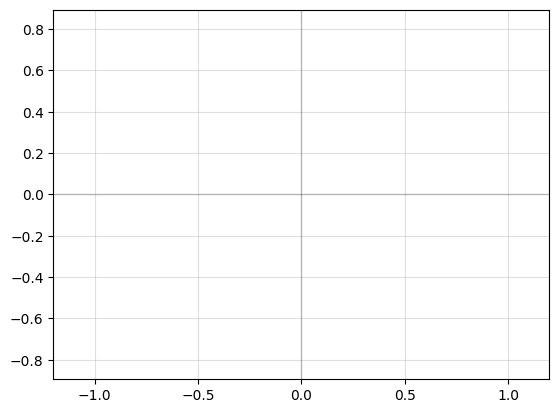

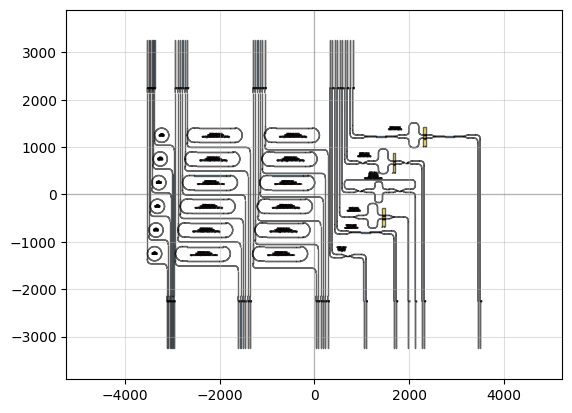

In [4]:
D1 = Device()
D2 = Device()
D3 = Device()
D4 = Device()
D5 = Device()
D6 = Device()
D7 = Device()
D8 = Device()
D9 = Device()
D10 = Device()
D11 = Device()
D12 = Device()
D13 = Device()
D14 = Device()
D15 = Device()

qp(D)

for ii in range(0,num_i):
    for jj in range(0, num_j):
        

        # dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i, (-(num_j - 1)/2+jj)*dev_pitch_j]
        #Test Euler rings
        
        if ii==0:

            #Basic Crosssections and paths
            cross_section_single = CrossSection().add(width = wg_pulley_bus, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            cross_section_facet = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            cross_section_multi= CrossSection().add(width = wg_mod, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            PositiveTaper1 = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_multi, width_type = 'linear')
            NegativeTaper1 = pp.transition(cross_section1 = cross_section_multi, cross_section2 = cross_section_single, width_type = 'linear')
            Taperpath1= pp.straight(length = (taperlength1))

            PositiveTaper_facet = Cross_ArbTaper(wg_input=wg_pulley_bus,wg_output=facet_width1,offset=0,layer=layer_wg)
            NegativeTaper_facet = Cross_ArbTaper(wg_input=facet_width1,wg_output=wg_pulley_bus,offset=0,layer=layer_wg)

            Taperpath1= pp.straight(length = (taperlength1))
            left_turn1 = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 10000)
            right_turn1 = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 10000)

            #Eulercurve Racetrack Resonator
            step=50
            dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i, (-(num_j - 1)/2+jj)*dev_pitch_j]
        
            coupler_angle=RT_clength/RT_radius/pi*180 #Coupling angle is defined by half
            ring_y_len1=0
            init_ring_x_len1=(Matchpath-ring_y_len1*2-RT_radius*2*pi)/2
            wgcp=RT_wgcp1[jj,0]

            init_ring1= D10.add_ref(nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = init_ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[0]).move([dev_center[0],dev_center[1]])
            init_ring_path= nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = init_ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[1]
            path_diff= Matchpath-init_ring_path

            ring_x_len1=init_ring_x_len1+path_diff/2
            
            ring1= D1.add_ref(nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[0]).move([dev_center[0],dev_center[1]])
            ring_path1= nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[1]
            
            coupler_wg1=D1.add_ref(coupler_pulley(width = wg_pulley_bus, radius = RT_radius,angle =coupler_angle, gap=0, layer = layer_wg, use_eff = True, p = 0)).connect('gap_center', ring1.ports['l'])
            coupler_wg1.movex(-wgcp)
            
            coupler_in1 = D1.add_ref(Path().append([
            pp.straight(length = (RT_radius))
            ]).extrude(cross_section_single)).connect('2', coupler_wg1.ports['u'])

            coupler_out1 = D1.add_ref(Path().append([
            pp.straight(length = (RT_radius))
            ]).extrude(cross_section_single)).connect('1', coupler_wg1.ports['d'])

            wg_couple_out1 = D1.add_ref(Path().append([
            left_turn1,
            pp.straight(length = (Matchpath-RT_wg_ring*4*pi)/2-radius_wg*2),
            right_turn1,
            ]).extrude(cross_section_single)).connect('1', coupler_out1.ports['2'])

            #to the facet
            #Main input and output
            wg_couple_in_end1 = D1.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
            wg_couple_in_end1.rotate(-90)
            wg_couple_in_end1.center = [ coupler_in1.xmin+wg_pulley_bus/2, chip_sizey/2-facet_length1/2]
        
            wg_couple_in_end11 = D1.add_ref(Path().append([
            Taperpath1
            ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_in_end1.ports['2'])
            
            D1.add_ref(pr.route_smooth(wg_couple_in_end11.ports['1'], coupler_in1.ports['1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
            
            wg_couple_out_end1 = D1.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
            wg_couple_out_end1.rotate(-90)
            wg_couple_out_end1.center = [ wg_couple_out1.xmax-wg_pulley_bus/2, -chip_sizey/2+facet_length1/2]
            
            wg_couple_out_end11 = D1.add_ref(Path().append([
            Taperpath1
            ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_out_end1.ports['1'])
            
            D1.add_ref(pr.route_smooth(wg_couple_out_end11.ports['1'], wg_couple_out1.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        
            
            temp1=200
            temp1=0
            text00 = 'PulleyResonator-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
            text11 = 'R ' + str(round(RT_radius, 4))+ ' gap ' + str(round(wgcp, 4))+' W1 ' + str(round(RT_wg_ring3, 4))+' W2 ' + str(round(RT_wg_ring4, 4))+' Clength' + str(round(RT_clength, 4))
            text22 = 'ngrp ' + str(round(ngrp, 4))+' & RoundingPath ' + str(round(Matchpath, 4))+'um & RFFSR '+ str(round(RFFSR0, 4))+'GHz'
            text33 = '^'
            
            label00 = D1.add_ref(pg.text(text00, size = 15, justify = 'center', layer = layer_label))
            label00.center = [ring1.xmin+RT_radius*4, ring1.y+30]
            label11 = D1.add_ref(pg.text(text11, size = 15, justify = 'center', layer = layer_label))
            label11.center = [label00.center[0], label00.center[1] -30]
            label22 = D1.add_ref(pg.text(text22, size = 15, justify = 'center', layer = layer_label))
            label22.center = [label00.center[0], label00.center[1] -60]

            text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
            text_wg_2 = '<'   # label for center of the feed waveguide
            text_wg_3 = '<<<'  # end of feed waveguide on the edge
            
            text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
            text_wg_2 = '<'   # label for center of the feed waveguide
            text_wg_3 = '<<<'  # end of feed waveguide on the edge
            
            label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
            label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
            label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
            label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
            label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
            label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
            label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
            label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]

        if ii==1:

        #Basic Crosssections and paths
            cross_section_single = CrossSection().add(width = wg_pulley_bus, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            cross_section_facet = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            cross_section_multi= CrossSection().add(width = wg_mod, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            PositiveTaper1 = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_multi, width_type = 'linear')
            NegativeTaper1 = pp.transition(cross_section1 = cross_section_multi, cross_section2 = cross_section_single, width_type = 'linear')
            Taperpath1= pp.straight(length = (taperlength1))

            PositiveTaper_facet = Cross_ArbTaper(wg_input=wg_pulley_bus,wg_output=facet_width1,offset=0,layer=layer_wg)
            NegativeTaper_facet = Cross_ArbTaper(wg_input=facet_width1,wg_output=wg_pulley_bus,offset=0,layer=layer_wg)

            Taperpath1= pp.straight(length = (taperlength1))
            left_turn1 = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 10000)
            right_turn1 = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 10000)

            #Eulercurve Racetrack Resonator
            step=50
            dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i, (-(num_j - 1)/2+jj)*dev_pitch_j]
        
            coupler_angle=RT_clength2/RT_radius/pi*180 #Coupling angle is defined by half
            ring_y_len1=0
            init_ring_x_len1=(Matchpath-ring_y_len1*2-RT_radius*2*pi)/2
            wgcp=RT_wgcp2[jj,0]

            init_ring1= D10.add_ref(nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = init_ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[0]).move([dev_center[0],dev_center[1]])
            init_ring_path= nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = init_ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[1]
            path_diff= Matchpath-init_ring_path

            ring_x_len1=init_ring_x_len1+path_diff/2
            
            ring1= D1.add_ref(nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[0]).move([dev_center[0],dev_center[1]])
            ring_path2= nonuniform_ring_racetrack_v4(width1 = RT_wg_ring3,width2=RT_wg_ring4, ring_x_len = ring_x_len1,taperlength=taperlength1, radius = RT_radius, layer = layer_ring, use_eff = True, p = Euler_ratio)[1]
            
            coupler_wg1=D1.add_ref(coupler_pulley(width = wg_pulley_bus, radius = RT_radius,angle =coupler_angle, gap=0, layer = layer_wg, use_eff = True, p = 0)).connect('gap_center', ring1.ports['l'])
            coupler_wg1.movex(-wgcp)
            
            coupler_in1 = D1.add_ref(Path().append([
            pp.straight(length = (RT_radius))
            ]).extrude(cross_section_single)).connect('2', coupler_wg1.ports['u'])

            coupler_out1 = D1.add_ref(Path().append([
            pp.straight(length = (RT_radius))
            ]).extrude(cross_section_single)).connect('1', coupler_wg1.ports['d'])

            wg_couple_out1 = D1.add_ref(Path().append([
            left_turn1,
            pp.straight(length = (Matchpath-RT_wg_ring*2*pi)/2-radius_wg*2),
            right_turn1,
            ]).extrude(cross_section_single)).connect('1', coupler_out1.ports['2'])

            #to the facet
            #Main input and output
            wg_couple_in_end1 = D1.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
            wg_couple_in_end1.rotate(-90)
            wg_couple_in_end1.center = [ coupler_in1.xmin+wg_pulley_bus/2, chip_sizey/2-facet_length1/2]
        
            wg_couple_in_end11 = D1.add_ref(Path().append([
            Taperpath1
            ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_in_end1.ports['2'])
            
            D1.add_ref(pr.route_smooth(wg_couple_in_end11.ports['1'], coupler_in1.ports['1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
            
            wg_couple_out_end1 = D1.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
            wg_couple_out_end1.rotate(-90)
            wg_couple_out_end1.center = [ wg_couple_out1.xmax-wg_pulley_bus/2, -chip_sizey/2+facet_length1/2]
            
            wg_couple_out_end11 = D1.add_ref(Path().append([
            Taperpath1
            ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_out_end1.ports['1'])
            
            D1.add_ref(pr.route_smooth(wg_couple_out_end11.ports['1'], wg_couple_out1.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
        
            
            temp1=200
            temp1=0
            text00 = 'PulleyResonator-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
            text11 = 'R ' + str(round(RT_radius, 4))+ ' gap ' + str(round(wgcp, 4))+' W1 ' + str(round(RT_wg_ring3, 4))+' W2 ' + str(round(RT_wg_ring4, 4))+' Clength' + str(round(RT_clength2, 4))
            text22 = 'ngrp ' + str(round(ngrp, 4))+' & RoundingPath ' + str(round(Matchpath, 4))+'um & RFFSR '+ str(round(RFFSR0, 4))+'GHz'
            text33 = '^'
            
            label00 = D1.add_ref(pg.text(text00, size = 15, justify = 'center', layer = layer_label))
            label00.center = [ring1.xmin+RT_radius*4, ring1.y+30]
            label11 = D1.add_ref(pg.text(text11, size = 15, justify = 'center', layer = layer_label))
            label11.center = [label00.center[0], label00.center[1] -30]
            label22 = D1.add_ref(pg.text(text22, size = 15, justify = 'center', layer = layer_label))
            label22.center = [label00.center[0], label00.center[1] -60]

            text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
            text_wg_2 = '<'   # label for center of the feed waveguide
            text_wg_3 = '<<<'  # end of feed waveguide on the edge
            
            text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
            text_wg_2 = '<'   # label for center of the feed waveguide
            text_wg_3 = '<<<'  # end of feed waveguide on the edge
            
            label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
            label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
            label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
            label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
            label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
            label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
            label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
            label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]

        if ii==2:
            
            #Basic Crosssections and paths
            cross_section_single = CrossSection().add(width = wg_pulley_bus, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            cross_section_facet = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            cross_section_multi= CrossSection().add(width = wg_mod, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
            
            PositiveTaper1 = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_multi, width_type = 'linear')
            NegativeTaper1 = pp.transition(cross_section1 = cross_section_multi, cross_section2 = cross_section_single, width_type = 'linear')
            

            PositiveTaper_facet = Cross_ArbTaper(wg_input=wg_pulley_bus,wg_output=facet_width1,offset=0,layer=layer_wg)
            NegativeTaper_facet = Cross_ArbTaper(wg_input=facet_width1,wg_output=wg_pulley_bus,offset=0,layer=layer_wg)

            Taperpath1= pp.straight(length = (taperlength1))
            left_turn1 = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 10000)
            right_turn1 = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 10000)
            
            def Y_AsymAM():
                D = Device()
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                    center_length2=center_length2))
                AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, pp.straight(length = turn_length1/2), right_turn1, right_turn1, pp.straight(length = turn_length1/2), left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                Ysplit_l=D.add_ref(Ysplitter_left(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])

                Ysplit_r=D.add_ref(Ysplitter_right(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', Ysplit_l.ports['in1'])

                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])

                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', Ysplit_r.ports['out1'])

                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])
            
                temp1=200
                text0 = 'AsymYMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMSegElec1.xmin-600, AMSegElec1.ymax +00]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
            
                return D
            
            def DC_AsymAM():
                D = Device()
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                    center_length2=center_length2))
                AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, pp.straight(length = turn_length1/2), right_turn1, right_turn1, pp.straight(length = turn_length1/2), left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                
                DC_left=D.add_ref(Directional_coupler_v2(width = wg_single, cp_len=couplinglength1, gap=couplinggap1, offset=DCoffset1,taperlength=100,layer = layer_wg))
                DC_left.connect(port = 'out1', destination = AM_armtop_input1.ports['1'])

                DC_right=D.add_ref(Directional_coupler_v2(width = wg_single, cp_len=couplinglength1, gap=couplinggap1, offset=DCoffset1,taperlength=100,layer = layer_wg))
                DC_right.connect(port = 'in1', destination = AM_armtop_output1.ports['2'])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in2'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_right.ports['out1'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_right.ports['out2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            
                temp1=200
                text0 = 'AsymDCMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMSegElec1.xmin-600, AMSegElec1.ymax +0]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-30]
                label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-30]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
            
                return D
            def DC_symAM():
                D = Device()
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                    center_length2=center_length2))
                AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1,  right_turn1, right_turn1,  left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                
                DC_left=D.add_ref(Directional_coupler_v2(width = wg_single, cp_len=couplinglength1, gap=couplinggap1, offset=DCoffset1,taperlength=100,layer = layer_wg))
                DC_left.connect(port = 'out1', destination = AM_armtop_input1.ports['1'])

                DC_right=D.add_ref(Directional_coupler_v2(width = wg_single, cp_len=couplinglength1, gap=couplinggap1, offset=DCoffset1,taperlength=100,layer = layer_wg))
                DC_right.connect(port = 'in1', destination = AM_armtop_output1.ports['2'])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in2'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_right.ports['out1'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_right.ports['out2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            
                temp1=200
                text0 = 'SymDCMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMSegElec1.xmin-600, AMSegElec1.ymax +00]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
            
                return D        
            def Bare_DC():
                D = Device()
                # AM 
                
                DC_left=D.add_ref(Directional_coupler_v2(width = wg_single, cp_len=couplinglength1, gap=couplinggap1, offset=DCoffset1,taperlength=100,layer = layer_wg))
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left.ports['in2'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_left.ports['out1'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_left.ports['out2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            
                temp1=200
                text0 = 'SymDCMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = ' gap' + str(round(couplinggap1, 4))+'Clength' + str(round(couplinglength1, 4))
                text2 = '& WGwidth ' + str(round(wg_single, 4))

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [DC_left.xmin, DC_left.ymax +150]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
                return D
            def MMI_AsymAM():
                D = Device()

                offsettobot = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
                offsettotop = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=-(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
            
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                    center_length2=center_length2))
                AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, pp.straight(length = turn_length1/2), right_turn1, right_turn1, pp.straight(length = turn_length1/2), left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                
                DC_left_outputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('2', AM_armtop_input1.ports['1'])
                DC_left_outputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('2', AM_armbot_input1.ports['1'])
                
                DC_left=D.add_ref(TwoTwoMMI(TwoMMI_wg_single = MMI_wg_single, TwoMMI_wg_taper = MMI_wg_taper, TwoMMI_wg_offset=MMI_wg_offset, TwoMMI_tlength=MMI_tlength, TwoMMI_clength=MMI_clength, TwoMMI_cwidth=MMI_cwidth, TwoMMI_layer=layer_wg))
                DC_left.connect(port = 'outputtop', destination = DC_left_outputtop.ports['1'])

                DC_left_inputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('2', DC_left.ports['inputtop'])
                DC_left_inputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('2', DC_left.ports['inputbot'])
            
                DC_right_inputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('1', AM_armtop_output1.ports['2'])
                DC_right_inputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('1', AM_armbot_output1.ports['2'])
               
                DC_right=D.add_ref(TwoTwoMMI(TwoMMI_wg_single = MMI_wg_single, TwoMMI_wg_taper = MMI_wg_taper, TwoMMI_wg_offset=MMI_wg_offset, TwoMMI_tlength=MMI_tlength, TwoMMI_clength=MMI_clength, TwoMMI_cwidth=MMI_cwidth, TwoMMI_layer=layer_wg))
                DC_right.connect(port = 'inputtop', destination = DC_right_inputtop.ports['2'])
                
                DC_right_outputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('1', DC_right.ports['outputtop'])
                DC_right_outputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('1', DC_right.ports['outputbot'])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputtop.ports['1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputbot.ports['1'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_right_outputtop.ports['2'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_right_outputbot.ports['2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            
                temp1=200
                text0 = 'AsymMMIMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMSegElec1.xmin-600, AMSegElec1.ymax +0]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -20]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -20]
               
                label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
            
                return D
            def MMI_symAM():
                D = Device()

                offsettobot = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
                offsettotop = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=-(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
            
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                    center_length2=center_length2))
                AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, right_turn1, right_turn1,left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                
                DC_left_outputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('2', AM_armtop_input1.ports['1'])
                DC_left_outputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('2', AM_armbot_input1.ports['1'])
                
                DC_left=D.add_ref(TwoTwoMMI(TwoMMI_wg_single = MMI_wg_single, TwoMMI_wg_taper = MMI_wg_taper, TwoMMI_wg_offset=MMI_wg_offset, TwoMMI_tlength=MMI_tlength, TwoMMI_clength=MMI_clength, TwoMMI_cwidth=MMI_cwidth, TwoMMI_layer=layer_wg))
                DC_left.connect(port = 'outputtop', destination = DC_left_outputtop.ports['1'])

                DC_left_inputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('2', DC_left.ports['inputtop'])
                DC_left_inputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('2', DC_left.ports['inputbot'])
            
                DC_right_inputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('1', AM_armtop_output1.ports['2'])
                DC_right_inputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('1', AM_armbot_output1.ports['2'])
               
                DC_right=D.add_ref(TwoTwoMMI(TwoMMI_wg_single = MMI_wg_single, TwoMMI_wg_taper = MMI_wg_taper, TwoMMI_wg_offset=MMI_wg_offset, TwoMMI_tlength=MMI_tlength, TwoMMI_clength=MMI_clength, TwoMMI_cwidth=MMI_cwidth, TwoMMI_layer=layer_wg))
                DC_right.connect(port = 'inputtop', destination = DC_right_inputtop.ports['2'])
                
                DC_right_outputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('1', DC_right.ports['outputtop'])
                DC_right_outputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('1', DC_right.ports['outputbot'])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputtop.ports['1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputbot.ports['1'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_right_outputtop.ports['2'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_right_outputbot.ports['2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            
                temp1=200
                text0 = 'SymMMIMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMSegElec1.xmin-600, AMSegElec1.ymax +00]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
            
                return D
            def Bare_MMI():
                D = Device()

                offsettobot = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
                offsettotop = Cross_ArbTaper(wg_input=wg_single,wg_output=wg_single,offset=-(signal_body_w/2+gap_body2/2-MMI_wg_offset/2),layer=layer_wg)
            
               
                
                
                DC_left=D.add_ref(TwoTwoMMI(TwoMMI_wg_single = MMI_wg_single, TwoMMI_wg_taper = MMI_wg_taper, TwoMMI_wg_offset=MMI_wg_offset, TwoMMI_tlength=MMI_tlength, TwoMMI_clength=MMI_clength, TwoMMI_cwidth=MMI_cwidth, TwoMMI_layer=layer_wg))

                DC_left_outputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('1', DC_left.ports['outputtop'])
                DC_left_outputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('1', DC_left.ports['outputbot'])
                

                DC_left_inputtop= D.add_ref(Path().append([Taperpath1]).extrude( offsettobot)).connect('2', DC_left.ports['inputtop'])
                DC_left_inputbot= D.add_ref(Path().append([Taperpath1]).extrude( offsettotop)).connect('2', DC_left.ports['inputbot'])

                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputtop.ports['1'])
                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm2_input2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(NegativeTaper1)).connect('2', DC_left_inputbot.ports['1'])
                AM_arm2_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm2_input2.ports['1'])
                AM_arm2_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm2_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1, pp.straight(length = step)
                ]).extrude(PositiveTaper1)).connect('1', DC_left_outputtop.ports['2'])
                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm2_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', DC_left_outputbot.ports['2'])
                AM_arm2_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm2_output2.ports['2'])
            

                
                D.center=(0,0)
                temp1=200
                text0 = 'BareMMIMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Clength' + str(round(MMI_clength, 4))+' Offset' + str(round(MMI_wg_offset, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                
                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [DC_left.xmin, DC_left.ymax +150]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                D.add_port(name='in2', port =  AM_arm2_input4.ports['1'])
                D.add_port(name='out2', port = AM_arm2_output3.ports['2'])
                
            
                return D
            
            def Local_MZMRes_passive(wg_width=0.8,cp_len=63.5,cp_gap=1,mod_l=500):
                D = Device()

                wg_width1=wg_width
                cp_len1=cp_len
                cp_gap1=cp_gap
                mod_l1=mod_l

                cross_section_single = CrossSection().add(width = wg_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
                cross_section_mod= CrossSection().add(width = wg_mod, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
        
                PositiveTaper = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_mod, width_type = 'linear')
                NegativeTaper = pp.transition(cross_section1 = cross_section_mod, cross_section2 = cross_section_single, width_type = 'linear')

                left_turn = pp.euler(radius = radius_wg-20, angle = 90, p = 0.5, use_eff = True, num_pts = 10000)
                right_turn = pp.euler(radius = radius_wg-20, angle = -90, p = 0.5, use_eff = True, num_pts = 10000)
            
                AMWG1= D.add_ref(Mod_WG_v2(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,taper_l = 0,mod_l = mod_l1,layer=layer_wg)[0])
            
                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn,
                right_turn,
                right_turn,
                left_turn,
                ]).extrude(cross_section_mod)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn,
                pp.straight(length = turn_length1/2), 
                left_turn,
                left_turn,
                pp.straight(length = turn_length1/2), 
                right_turn,
                ]).extrude(cross_section_mod)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper)).connect('1', AMWG1.ports['rb'])
                
                Ysplit_l=D.add_ref(Directional_coupler_v3(width = wg_width1, cp_len=cp_len1, gap=cp_gap1, offset=DCoffset1,taperlength=100,layer = layer_wg
                                                )[0]).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])
                
                Ysplit_r=D.add_ref(Directional_coupler_v3(width = wg_width1, cp_len=cp_len1, gap=cp_gap1, offset=DCoffset1,taperlength=100,layer = layer_wg
                                                )[0]).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
                
                AM_armtop_input2= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper)).connect('2', Ysplit_l.ports['in1'])
                AM_armbot_input2= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper)).connect('2', Ysplit_l.ports['in2'])
                
                AM_armtop_output2= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper)).connect('1', Ysplit_r.ports['out1'])
                AM_armbot_output2= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper)).connect('1', Ysplit_r.ports['out2'])

                AM_arm_input3= D.add_ref(Path().append([
                left_turn1,pp.straight(length = (abs(50)))
                ]).extrude(cross_section_multi)).connect('2', AM_armbot_input2.ports['1'])
                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_armbot_output2.ports['2'])

                #make racetrack
                make_turn = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True)
                top_path=pp.straight(length = (abs(AM_armtop_output2.xmax-AM_armtop_input2.xmin)))
                racetrack_arm = Path()
                racetrack_arm.append([
                    
                    make_turn,
                    make_turn,
                    top_path,
                    make_turn,
                    make_turn
                ])
                ring= D.add_ref(Path().append([racetrack_arm]).extrude( cross_section_mod)).connect('1', AM_armtop_input2.ports['1'])
                
                armlength1=racetrack_arm.length()
                armlength2=Directional_coupler_v3(width = wg_width1, cp_len=cp_len1, gap=cp_gap1, offset=DCoffset1,taperlength=100,layer = layer_wg)[1]*2+Taperpath1.length()*4+Mod_WG_v2(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,taper_l = 0,mod_l = mod_l,layer=layer_wg)[1]
                pathlength=armlength1+armlength2

                #labels
                temp1=200
                text0 = 'InB_MZI_Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'WGW' + str(round(wg_width1, 4))+' Gap' + str(round(cp_gap1, 4))+' CL' + str(round(cp_len1, 4))
                text2 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text3 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))+'& FSR ' + str(round(RFFSR0, 4))
            

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMWG1.x-300, AMWG1.ymax +350]
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -40]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -40]
                label3 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                label3.center = [label0.center[0], label2.center[1] -40]
                


                D.add_port(name='center_up',  port = AMWG1.ports['center_up'])
                D.add_port(name='center_down',  port = AMWG1.ports['center_down'])
                D.add_port(name='in1', port = AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
                
                return D, pathlength
            if jj>=4 and jj <5: #DC Asym
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i+120+250, (-(num_j - 1)/2+jj)*dev_pitch_j-50]
            
                #AsymAM
                Mod1= D1.add_ref(DC_AsymAM())
                Mod1.center=dev_center
                
                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]

                wg_couple_in_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end2.rotate(-90)
                wg_couple_in_end2.center = [ Mod1.ports['in2'].x, chip_sizey/2-facet_length1/2]
                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                
                wg_couple_out_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end2.rotate(-90)
                wg_couple_out_end2.center = [ Mod1.ports['out2'].x, -chip_sizey/2+facet_length1/2]
                

                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], Mod1.ports['in2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end2.ports['1'], Mod1.ports['out2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]
            if jj>=0 and jj <1: #Bare DC
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*4*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i-450+250, (-(num_j - 1)/2+jj)*dev_pitch_j]
            
                #AsymAM
                Mod1= D1.add_ref(Bare_DC())
                Mod1.center=dev_center
                
                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]

                wg_couple_in_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end2.rotate(-90)
                wg_couple_in_end2.center = [ Mod1.ports['in2'].x, chip_sizey/2-facet_length1/2]
                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                
                wg_couple_out_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end2.rotate(-90)
                wg_couple_out_end2.center = [ Mod1.ports['out2'].x, -chip_sizey/2+facet_length1/2]
                

                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], Mod1.ports['in2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end2.ports['1'], Mod1.ports['out2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]
            if jj>=5 and jj <6: #MMI Asym
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i+720+250, (-(num_j - 1)/2+jj)*dev_pitch_j]
            
                #AsymAM
                Mod1= D1.add_ref(MMI_AsymAM())
                Mod1.center=dev_center
                
                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]

                wg_couple_in_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end2.rotate(-90)
                wg_couple_in_end2.center = [ Mod1.ports['in2'].x, chip_sizey/2-facet_length1/2]
                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                
                wg_couple_out_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end2.rotate(-90)
                wg_couple_out_end2.center = [ Mod1.ports['out2'].x, -chip_sizey/2+facet_length1/2]
                

                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], Mod1.ports['in2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end2.ports['1'], Mod1.ports['out2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]
            if jj>=1 and jj <2: #Bare MMI
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*4*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i-280+250, (-(num_j - 1)/2+jj)*dev_pitch_j]
            
                #AsymAM
                Mod1= D1.add_ref(Bare_MMI())
                Mod1.center=dev_center
                
                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]

                wg_couple_in_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end2.rotate(-90)
                wg_couple_in_end2.center = [ Mod1.ports['in2'].x, chip_sizey/2-facet_length1/2]
                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                
                wg_couple_out_end2 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end2.rotate(-90)
                wg_couple_out_end2.center = [ Mod1.ports['out2'].x, -chip_sizey/2+facet_length1/2]
                

                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_in_end2.ports['2'], Mod1.ports['in2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end2.ports['1'], Mod1.ports['out2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]
            if jj>=2 and jj < 3: #Y asym
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i+250, (-(num_j - 1)/2+jj)*dev_pitch_j-200]
            
                #AsymAM
                Mod1= D1.add_ref(Y_AsymAM())
                Mod1.center=dev_center
                
                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]
                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                


                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
            
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]
            if jj>=3 and jj <4: # MZAi coupled ring
                #Eulercurve Racetrack Resonator
                step=50
                dev_center = [ step*jj+(-(num_i - 1)/2+(ii))*dev_pitch_i+50+250, (-(num_j - 1)/2+jj)*dev_pitch_j-100]
            
                #AsymAM
                AM_len1=50
                
                Mod1= D1.add_ref(Local_MZMRes_passive(wg_width=wg_single,cp_len=couplinglength1,cp_gap=1,mod_l=AM_len1)[0])
                Mod1.center=dev_center

                # AM facets
                wg_couple_in_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_in_end1.rotate(-90)
                wg_couple_in_end1.center = [ Mod1.ports['in1'].x, chip_sizey/2-facet_length1/2]

                
                wg_couple_out_end1 = D2.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
                wg_couple_out_end1.rotate(-90)
                wg_couple_out_end1.center = [ Mod1.ports['out1'].x, -chip_sizey/2+facet_length1/2]
                

                #Connect to the facet
                D2.add_ref(pr.route_smooth(wg_couple_in_end1.ports['2'], Mod1.ports['in1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                D2.add_ref(pr.route_smooth(wg_couple_out_end1.ports['1'], Mod1.ports['out1'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                
                text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(jj+1, 4))
                text_wg_2 = '<'   # label for center of the feed waveguide
                text_wg_3 = '<<<'  # end of feed waveguide on the edge
                text_wg_4 = str(round(ii+2, 4)) + ',' + str(round(jj+1, 4)) 
                
                label_wg_in = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_in.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1]
                label_wg_in_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_in_2.center = [wg_couple_in_end1.center[0] + step/2 ,wg_couple_in_end1.ymax - facet_length1-20]
            
                
                label_wg_out = D1.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
                label_wg_out.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin +facet_length1]
                label_wg_out_2 = D1.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
                label_wg_out_2.center = [wg_couple_out_end1.center[0] + step/2 ,wg_couple_out_end1.ymin + facet_length1-20]        

D.add_ref(D2)
D.add_ref(D1)


num_l=6
ll=0
for ll in range(0,num_l):
    

        #Test rings
        ring1 = D6.add_ref(ring_circle(radius = Tring_radius, width = Tring_wg_ring1, angle_resolution = 0.5, layer = layer_ring))
        ring1.move([Tring_step*(ll)+Tring_xoffset1, (-(num_l - 1)/2+ll)*Tring_dev_pitch_j2])

        left_turn2 = pp.euler(radius = Tring_bend_radius, angle = 90, p = 0.5, use_eff = True)
        right_turn2 = pp.euler(radius = Tring_bend_radius, angle = -90, p = 0.5, use_eff = True)
        cross_section_single = CrossSection().add(width = Tring_wg_single, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])

        coupler1 = D6.add_ref(coupler_straight(width = Tring_wg_single, length = Tring_radius*1.5, layer = layer_wg)).connect(port = 'coup', destination = ring1.ports['l']).move([-Tring_wgcp1[ll,0],0])
        cross_section_single2 = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])

        wg_dev_out = D6.add_ref(Path().append([
                left_turn2, 
                pp.straight(length = Hpath1),
                right_turn2,
                ]).extrude(cross_section_single)).connect('1', coupler1.ports['1'])

        wg_couple_in_end1 = D6.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_in_end1.rotate(-90)
        wg_couple_in_end1.center = [ coupler1.xmin+Tring_wg_single/2, chip_sizey/2-facet_length1/2]

        wg_couple_in_end11 = D6.add_ref(Path().append([
        Taperpath1
        ]).extrude(NegativeTaper_facet)).connect('1', wg_couple_in_end1.ports['2'])

        D6.add_ref(pr.route_smooth(wg_couple_in_end11.ports['2'], coupler1.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))

        wg_couple_out_end1 = D6.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        wg_couple_out_end1.rotate(-90)
        wg_couple_out_end1.center = [ wg_dev_out.xmax-Tring_wg_single/2, -chip_sizey/2+facet_length1/2]
                
        wg_couple_out_end11 = D6.add_ref(Path().append([
        Taperpath1
        ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_out_end1.ports['1'])

        D6.add_ref(pr.route_smooth(wg_couple_out_end11.ports['1'], wg_dev_out.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                
        #Text
        text0 = 'TRing ' + str(round(ii+1, 4)) + ', ' + str(round(ll+1, 4))
        text3 = 'wgcp ' + str(round(Tring_wgcp1[ll,0], 4)) + ' , radius ' + str(round(Tring_radius, 4))
        text4 = 'BWidth ' + str(round(Tring_wg_single, 4)) + ' , RWidth' + str(round(Tring_wg_ring1, 4))

        label_ring0 = D6.add_ref(pg.text(text0, size = 7, justify = 'center', layer = layer_label))
        label_ring0.center = [ring1.center[0], ring1.center[1] + 30]
        label_ring1 = D6.add_ref(pg.text(text3, size = 7, justify = 'center', layer = layer_label))
        label_ring1.center = [label_ring0.center[0], label_ring0.center[1] -20]
        label_ring2 = D6.add_ref(pg.text(text4, size = 7, justify = 'center', layer = layer_label))
        label_ring2.center = [label_ring0.center[0], label_ring0.center[1] -40]


        text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(ll+1, 4))
        text_wg_2 = '<'   # label for center of the feed waveguide
        text_wg_3 = '<<<'  # end of feed waveguide on the edge

        label_wg_in = D6.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        label_wg_in.center = [wg_couple_in_end1.center[0] + Tring_step/2 ,wg_couple_in_end1.ymax - facet_length1]
        label_wg_in_2 = D6.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        label_wg_in_2.center = [wg_couple_in_end1.center[0] + Tring_step/2 ,wg_couple_in_end1.ymax - facet_length1-20]

        label_wg_out = D6.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        label_wg_out.center = [wg_couple_out_end1.center[0] + Tring_step/2 ,wg_couple_out_end1.ymin +facet_length1]
        label_wg_out_2 = D6.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        label_wg_out_2.center = [wg_couple_out_end1.center[0] + Tring_step/2 ,wg_couple_out_end1.ymin + facet_length1-20]

D.add_ref(D6) 
D.center=(0,0)

qp(D)

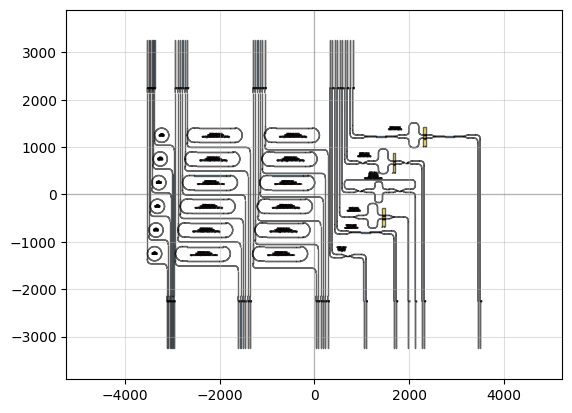

In [5]:
qp(D)

In [6]:
U = Ysplitter_right

In [7]:
def Y_AsymAM():
                D = Device()
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                # AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                # layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                # center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                #     center_length2=center_length2))
                # AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, pp.straight(length = turn_length1/2), right_turn1, right_turn1, pp.straight(length = turn_length1/2), left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1'])
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1'])
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt'])
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                Ysplit_l=D.add_ref(Ysplitter_left(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])

                Ysplit_r=D.add_ref(Ysplitter_right(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
                
                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', Ysplit_l.ports['in1'])

                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])

                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])

                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', Ysplit_r.ports['out1'])

                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])
            
                temp1=200
                text0 = 'AsymYMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                text3 = '^'

                label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                label0.center = [AMWG1.xmin-600, AMWG1.ymax +200] # center the red label
                label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                label1.center = [label0.center[0], label0.center[1] -30]
                label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                label2.center = [label0.center[0], label1.center[1] -30]
               
                # label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                # label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                # label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                # label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1'])
                D.add_port(name='out1', port = AM_arm_output3.ports['2'])
            
                return D

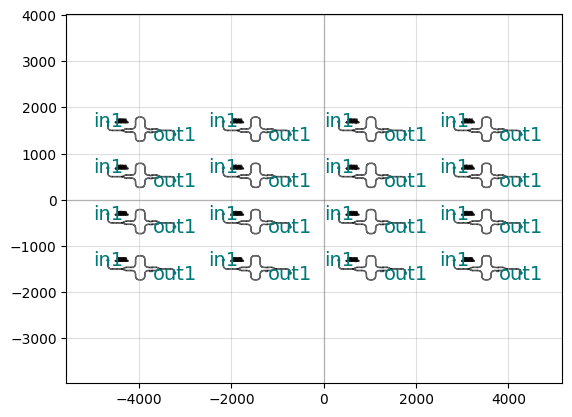

In [8]:
import phidl.geometry as pg
from phidl import Device
import phidl.routing as pr

# Assuming these functions exist in your notebook:
# MMI_AsymAM() and pr.route_smooth()

# Function to create a 4x4 matrix of Y_AsymAM devices
def create_chip_matrix():
    # Initialize the main device
    D = Device('Y_AsymAM_Chip')

    dev_pitch_i = 2500  # Horizontal spacing
    dev_pitch_j = 1000  # Vertical spacing
    
    # Loop to create a 4x4 matrix of Y_AsymAM devices
    for ii in range(4):  # 4 rows
        for jj in range(4):  # 4 columns
            Mod1 = D.add_ref(Y_AsymAM())  # Add the MMI AsymAM device to the chip
            
            # Position the device in the grid
            step_x = (-(4 - 1)/2 + ii) * dev_pitch_i
            step_y = (-(4 - 1)/2 + jj) * dev_pitch_j
            Mod1.move([step_x, step_y])  # Move the device to its position in the grid

            # # Create input and output waveguides (using pg.straight() for creating straight paths)
            # wg_in = D.add_ref(pg.straight(length=50, width=0.5))  # Create a straight input waveguide
            # wg_out = D.add_ref(pg.straight(length=50, width=0.5))  # Create a straight output waveguide
            
            # # Move waveguides to their positions relative to the device
            # wg_in.move(destination=(Mod1.ports['in1'].x - 50, Mod1.ports['in1'].y))  # Adjust as needed
            # wg_out.move(destination=(Mod1.ports['out1'].x + 50, Mod1.ports['out1'].y))  # Adjust as needed

            # # Connect to the input/output ports (adjust routing functions based on the notebook)
            # D.add_ref(pr.route_smooth(wg_in.ports[1], Mod1.ports['in1']))  # Connect input
            # D.add_ref(pr.route_smooth(Mod1.ports['out1'], wg_out.ports[2]))  # Connect output

    return D

    # Export the device to a GDS file
    # gds_file = 'Y_AsymAM_Chip.gds'
    # D.write_gds(gds_file)



# Run the function to create the matrix
K = create_chip_matrix()
J = Y_AsymAM()
qp(K)

In [9]:
dev_name = '240916_Etchtest'

#EBL markers

marker2_x = marker1_x - 250
marker2_y = marker1_y - 200

marker3_y = marker2_y - 200
marker4_y = marker3_y - 200
marker5_y = marker1_y + 200


D13.add_ref(marker_dice_array(marker_x = chip_sizex/2, marker_y = chip_sizey/2, layer = layer_marker))
D13.add_ref(marker_dice_array(marker_x = marker_dice_x, marker_y = marker_dice_y, layer = layer_marker))
D.add_ref(D13)

D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker1_y,arm_length = 10, arm_width = 20, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker2_x, marker_y = marker1_y,arm_length = 15, arm_width = 30, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker3_y,arm_length = 10, arm_width = 20, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker2_x, marker_y = marker3_y,arm_length = 15, arm_width = 30, layer = layer_marker))
D12.add_ref(marker1_array(marker_x = marker1_x, marker_y = marker4_y,arm_length = 50, arm_width = 10, layer = layer_marker))
D12.add_ref(inv_marker1_array(marker_x = marker2_x, marker_y = marker4_y,arm_length = 40, arm_width = 10, layer = layer_marker))

D12.add_ref(calipermarker_array(marker_x = marker1_x, marker_y = marker2_y, arm_length = 50, arm_width=2, num_notches=7, layer1= layer_marker, layer2=layer_test))
D12.add_ref(DLalignmarker_array(marker_x = marker2_x, marker_y = marker2_y, arm_length = 40, layer1= layer_marker, layer2=layer_test))
# D12.move([1000,0])
D.add_ref(D12)


#Deep etching mask
Etchwidth=10
Detchmask1= D14.add_ref(pg.rectangle(size = (chip_sizex+1000-Etchwidth, marker_dice_y*2-Etchwidth), layer = layer_Detch))
Detchmask2 = D15.add_ref(pg.outline(D14, distance = Etchwidth, precision = 1e-6, layer = layer_Detch))
Detchmask2.center=[0,0]
D.add_ref(D15)


# device name

file_name = dev_name +'.gds'
label_dev = D.add_ref(pg.text(file_name, size = 150, justify = 'center', layer = layer_label))
label_dev.rotate(-90)
label_dev.center = [chip_sizex/2*0.8,0]

D.flatten()
pattern_area = D.area()*10**-6 # unit mm^2
#%%
D.write_gds(file_name,
             unit = 1e-6, precision = 1e-10)
print('GDS saved')
print('pattern area = %.3f mm^2' % pattern_area)
print('Racetrack path = %.3f um' % (Matchpath))
print('Ring1 path = %.3f um' % (ring_path1))
print('Ring1 path = %.3f um' % (ring_path2))
print('GDS saved')

GDS saved
pattern area = 1.221 mm^2
Racetrack path = 2668.380 um
Ring1 path = 2668.380 um
Ring1 path = 2668.380 um
GDS saved


/Users/kamilakunes/Desktop/MJLab/Phase Change Modulator/ModCAD/.venv/lib/python3.10/site-packages/phidl/device_layout.py:1555: UserWarning: [GDSPY] Polygons with more than 8190 are not supported by the official GDSII specification.  This GDSII file might not be compatible with all readers.
  lib.write_gds(filename, cells=all_cells)
